## Project for Big Data Analytics

<b> Submitted by: </b> <br> 
    <b>Name</b> Muhammad Salman Akhtar <b>CMS ID</b> 398895<br>
    <b>Name</b> Hamza Iftikhar <b>CMS ID</b> 364472<br>

## Project Description

This project demonstrates the effectiveness of Big Data Analytics for solving a complex problem. The dataset used for this project is a COVID-19 Dataset published on Kaggle [link](https://www.kaggle.com/datasets/meirnizri/covid19-dataset). <br>
COVID-19 is a viral illness that is transmitted through respiratory droplets. While the majority of individuals who contract the virus experience mild to moderate respiratory symptoms and can recover without medical intervention, those who are older or have pre-existing conditions such as cardiovascular disease, diabetes, chronic respiratory disease, or cancer may be at higher risk for serious illness.<br>
One of the ongoing challenges for healthcare providers during the pandemic has been the limited availability of medical resources and an effective plan for distributing them. Having the ability to predict the resources that an individual may need upon testing positive for COVID-19, or even before, could greatly assist authorities in securing and organizing the necessary resources to treat and potentially save the patient's life. This would be especially valuable during these difficult times. <br>
The purpose of this project is to develop a machine learning model that can predict whether a COVID-19 patient is at high risk based on their current symptoms, health status, and medical history.

## Dataset Description

This dataset contains a large amount of anonymous patient information, including preexisting conditions. The raw dataset includes 21 unique features and over 1 million unique patients. In the Boolean features, a value of 1 indicates "yes" and a value of 2 indicates "no," while values of 97 and 99 represent missing data. The features in the dataset include: sex (1 for female, 2 for male), age of the patient, classification of COVID-19 test results (values 1-3 indicate a positive diagnosis at different levels, while values 4 or higher indicate a negative or inconclusive test), patient type (1 for patients who returned home, 2 for hospitalization), pneumonia (indicating the presence or absence of air sac inflammation), pregnancy, diabetes, Chronic Obstructive Pulmonary Disease (COPD), asthma, immunosuppression, hypertension, cardiovascular disease, chronic renal disease, other disease, obesity, tobacco use, level of care received in medical units, type of institution in the National Health System providing care, use of a ventilator, admission to an Intensive Care Unit (ICU), and date of death (if applicable).

## Import Required Modules

In [150]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix,r2_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## Data Loading

In [70]:
df=pd.read_csv("Covid Data.csv")

## Checking the Data

In [71]:
# data.info()
# df.nunique()
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## Exploring Data

In [72]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64


97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


97    523511
2     51317

## Data preprocessing <br>
Replace non available entries with 2 (dataset signifies 97, 98 and 99 as non available entries) <br>
Replace 2 with 0 (dataset signifies 2 to be false and 1 to be true)

In [73]:
df['USMER'] = df['USMER'].replace(2,0)
df['SEX'] = df['SEX'].replace(2,0)
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].replace(2,0)
df['INTUBED'] = df['INTUBED'].replace(2,0)
df['INTUBED'] = df['INTUBED'].replace([97,99],2)
df['PNEUMONIA'] = df['PNEUMONIA'].replace(2,0)
df['PNEUMONIA'] = df['PNEUMONIA'].replace(99,2)
df.PREGNANT[(df["SEX"]==0) & (df.PREGNANT==98)] = 0
df.PREGNANT[(df["SEX"]==0) & (df.PREGNANT==97)] = 0
df['PREGNANT'] = df['PREGNANT'].replace(2,0)
df['PREGNANT'] = df['PREGNANT'].replace([97,98],0)
df['DIABETES'] = df['DIABETES'].replace(2,0)
df['DIABETES'] = df['DIABETES'].replace(98,2)
df['COPD'] = df['COPD'].replace(2,0)
df['COPD'] = df['COPD'].replace(98,2)
df['ASTHMA'] = df['ASTHMA'].replace(2,0)
df['ASTHMA'] = df['ASTHMA'].replace(98,2)
df['INMSUPR'] = df['INMSUPR'].replace(2,0)
df['INMSUPR'] = df['INMSUPR'].replace(98,2)
df['HIPERTENSION'] = df['HIPERTENSION'].replace(2,0)
df['HIPERTENSION'] = df['HIPERTENSION'].replace(98,2)
df['OTHER_DISEASE'] = df['OTHER_DISEASE'].replace(2,0)
df['OTHER_DISEASE'] = df['OTHER_DISEASE'].replace(98,2)
df['CARDIOVASCULAR'] = df['CARDIOVASCULAR'].replace(2,0)
df['CARDIOVASCULAR'] = df['CARDIOVASCULAR'].replace(98,2)
df['OBESITY'] = df['OBESITY'].replace(2,0)
df['OBESITY'] = df['OBESITY'].replace(98,2)
df['TOBACCO'] = df['TOBACCO'].replace(2,0)
df['TOBACCO'] = df['TOBACCO'].replace(98,2)
df['ICU'] = df['ICU'].replace(2,0)
df['ICU'] = df['ICU'].replace([97,99],2)
df['RENAL_CHRONIC'] = df['RENAL_CHRONIC'].replace(2,0)
df['RENAL_CHRONIC'] = df['RENAL_CHRONIC'].replace(98,2)
df["SURVIVED"]=[1 if i=="9999-99-99" else 0 for i in df["DATE_DIED"]]
df.drop("DATE_DIED",axis=1,inplace=True)
df["INFECTED"]=[1 if each<4 else 0 for each in df["CLASIFFICATION_FINAL"]]
df.drop("CLASIFFICATION_FINAL",axis=1,inplace=True)

<b>Remove columns(INTUBED and ICU) because most of their entries have null entries</b>

In [74]:
df.drop(columns=["INTUBED"],inplace=True)
df.drop(columns=["ICU"],inplace=True)

<b> Removing entries that are null </b>

In [75]:
columns=["USMER","SEX","PATIENT_TYPE","PNEUMONIA","PREGNANT","DIABETES","COPD","ASTHMA","INMSUPR","HIPERTENSION",
         "OTHER_DISEASE","CARDIOVASCULAR","OBESITY","RENAL_CHRONIC","TOBACCO", "SURVIVED", "INFECTED"]
for i in columns:
    df.drop(df[df[i]==2].index,inplace=True)
df.reset_index(inplace=True,drop=True)

## Data Visualization

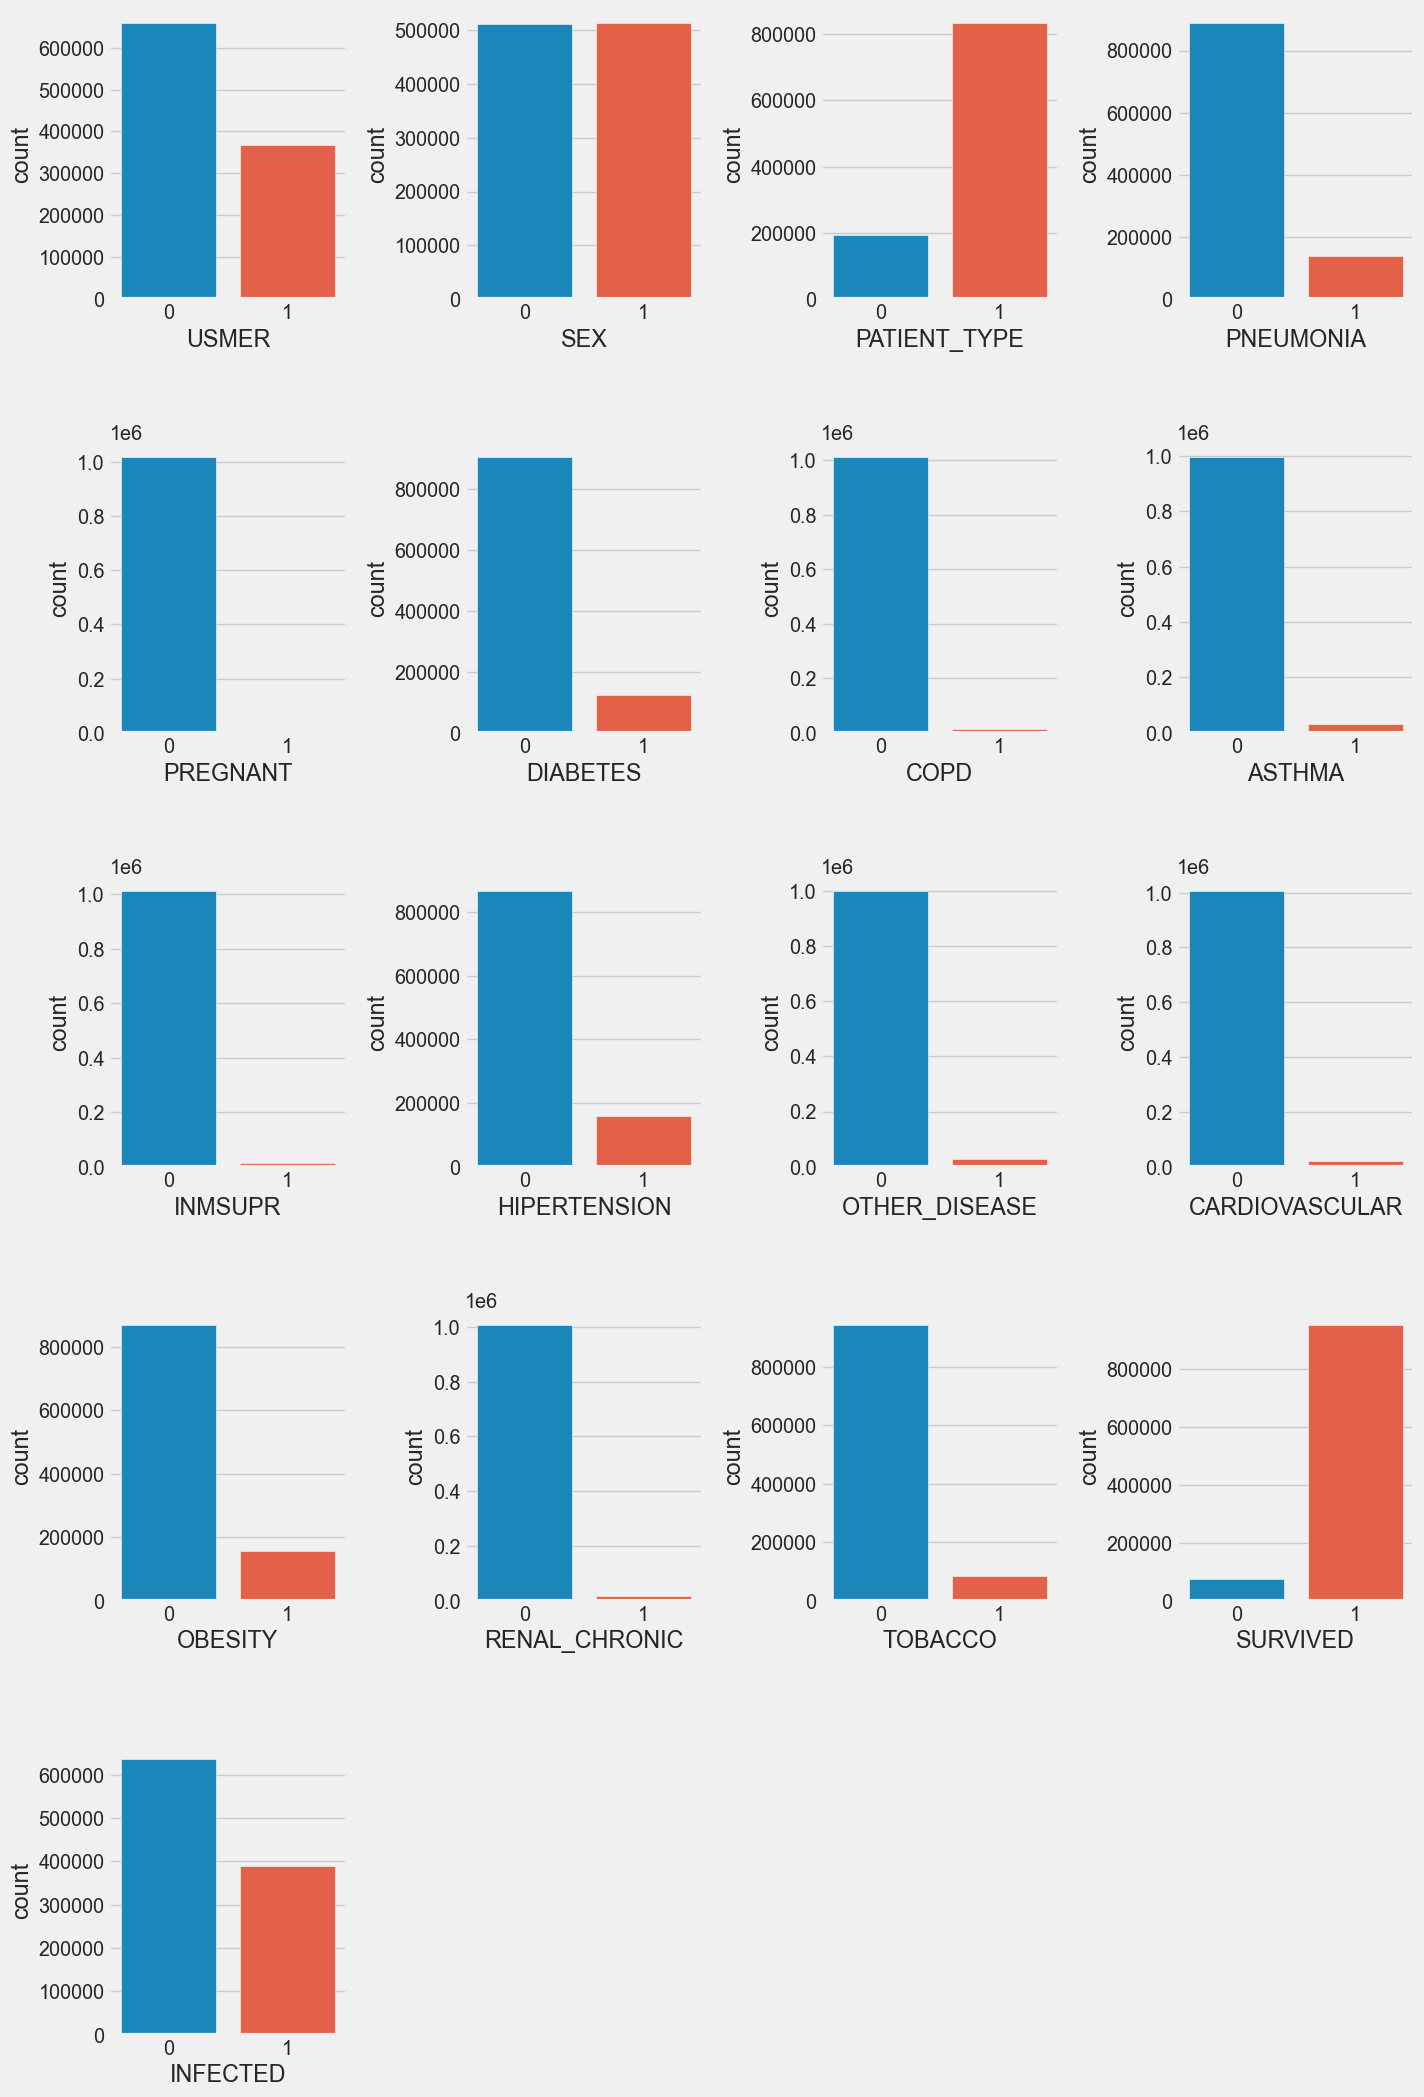

In [76]:
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=.5, wspace=.5)

for i, column in enumerate(columns):
    ax = fig.add_subplot(5,4,i+1)
    sns.countplot(df[column])
#     abs_values = df[column].value_counts()
#     ax.bar_label(container=ax.containers[0], labels=abs_values)


## Age Distribution

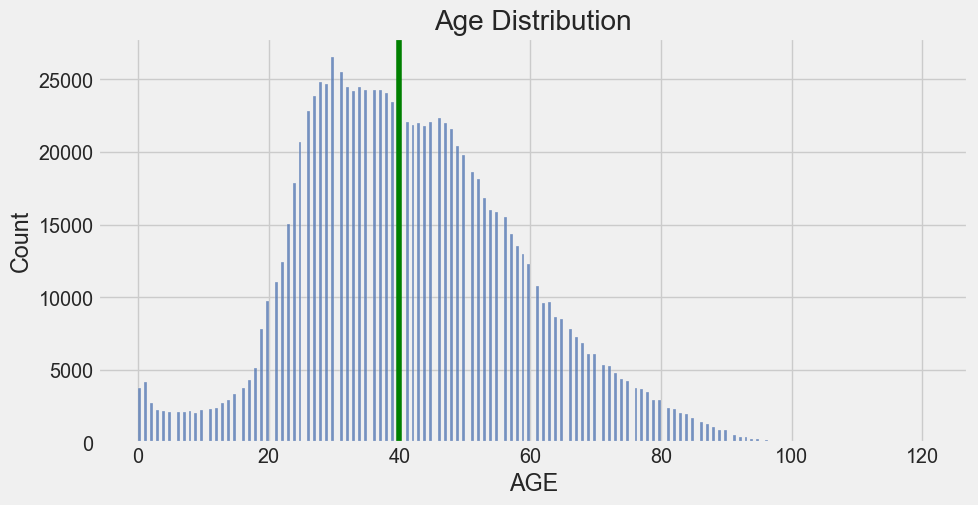

In [77]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['AGE'])
plt.axvline(df['AGE'].median(), color='green')
plt.title("Age Distribution");

## Correlation between features

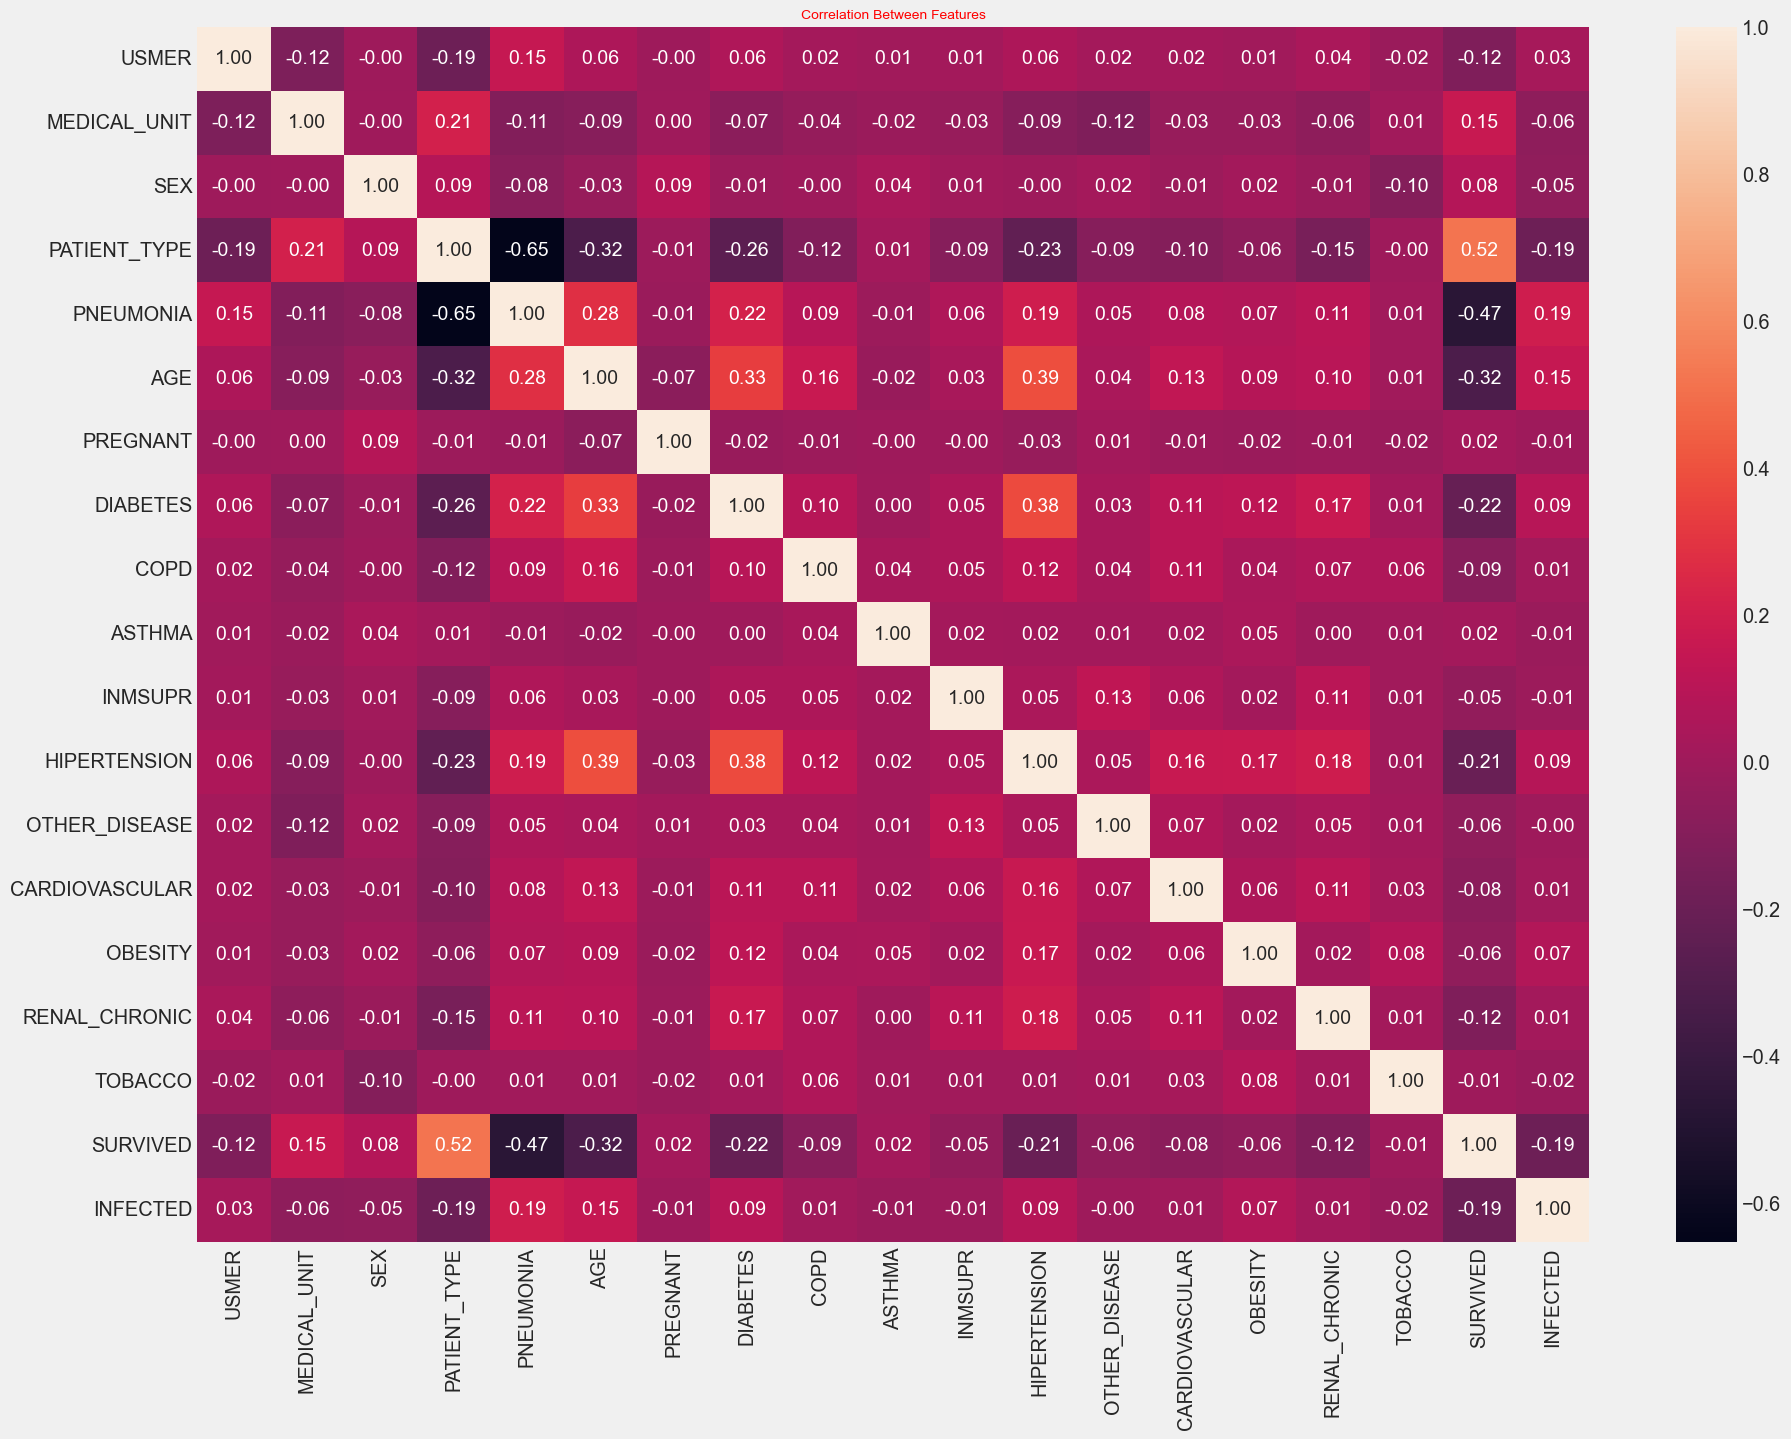

In [78]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=10,color="red");

## Plot for comparing survived patients and their ages

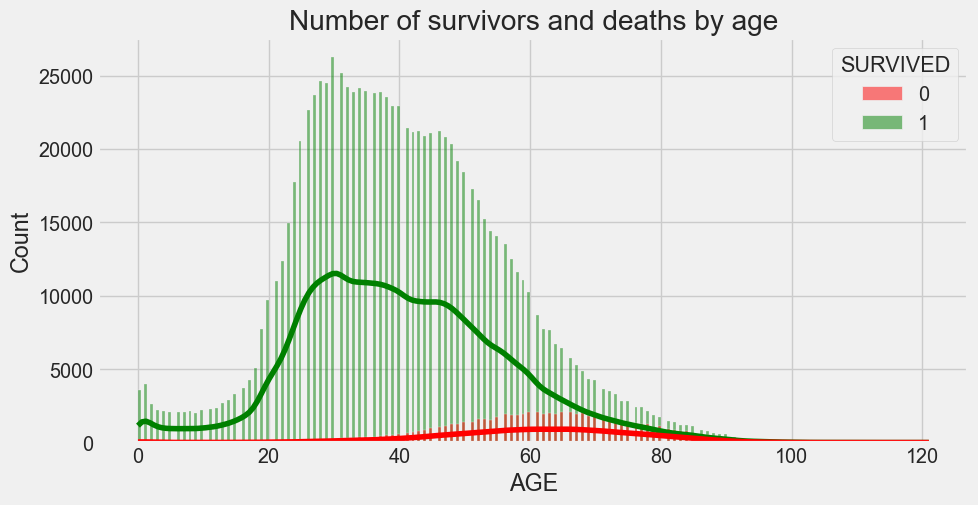

In [79]:
plt.figure(figsize=(10,5))
sns.histplot(x=df.AGE,hue=df.SURVIVED,legend=True,palette=["red","green"],kde=True).set(title="Number of survivors and deaths by age")
plt.show()

## Plot depicting survivals and death for hospitalised and non hospitalised patients

[Text(0.5, 1.0, 'survivals for hospitalized and non-hospitalized people')]

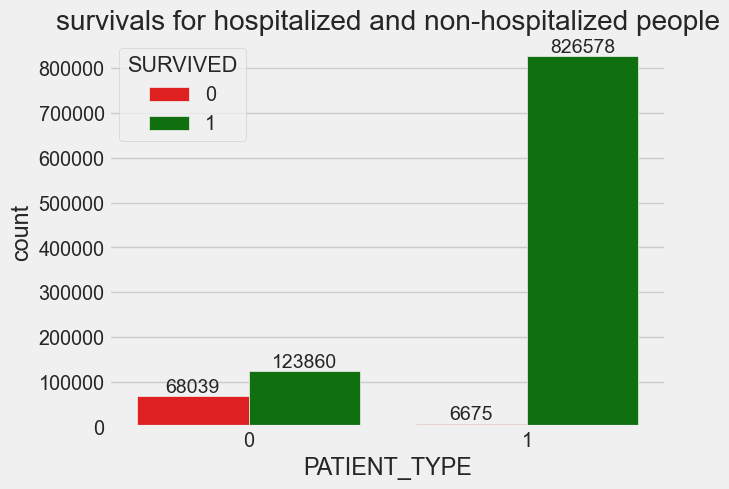

In [137]:
plt.figure()
# ax = sns.countplot(x=df.PATIENT_TYPE,hue=df.SURVIVED, palette=["red","green"]).set(title="survivals for hospitalized and non-hospitalized people")
ax = sns.countplot(x="PATIENT_TYPE", data=df, hue = 'SURVIVED', palette=["red","green"])
for container in ax.containers:
    ax.bar_label(container)
ax.set(title="survivals for hospitalized and non-hospitalized people")

## Plot depicting survivals and death for Pneumonia patients

[Text(0.5, 1.0, 'Survival for people with and without pneumonia')]

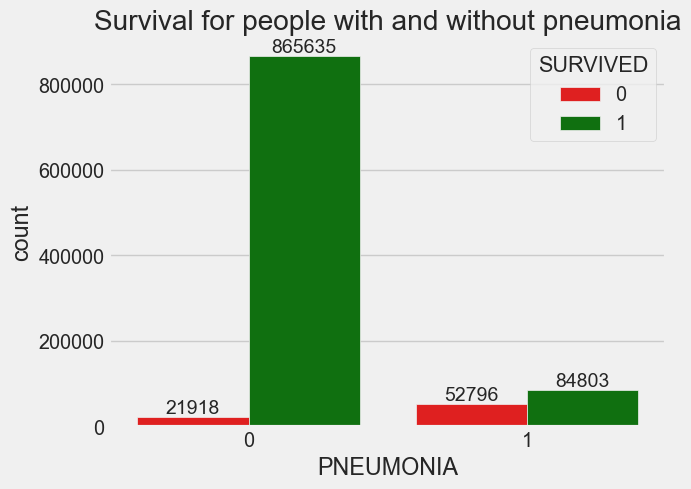

In [138]:
plt.figure()
# sns.countplot(x=df.PNEUMONIA,hue=df.SURVIVED,palette=["red","green"]).set(title="Survival for people with and without pneumonia")
ax = sns.countplot(x="PNEUMONIA", data=df, hue = 'SURVIVED', palette=["red","green"])
for container in ax.containers:
    ax.bar_label(container)
ax.set(title="Survival for people with and without pneumonia")

## Scale features (Age and Medical unit) <br>
Scale between -1 to 1

In [88]:
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))
df.MEDICAL_UNIT=scaler.fit_transform(df.MEDICAL_UNIT.values.reshape(-1,1))

<b> Extract ground truth (survivals) from data (features) </b>

In [89]:
x=df.drop(columns="SURVIVED")
y=df.SURVIVED

## Split data into test and training sets

In [161]:
ros=RandomOverSampler(random_state=50)
x_ros,y_ros=ros.fit_resample(x, y)
x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.15,random_state=50)
# rus=RandomUnderSampler(random_state=50)
# x_rus,y_rus=rus.fit_resample(x, y)
# x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.15,random_state=50)
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=50)

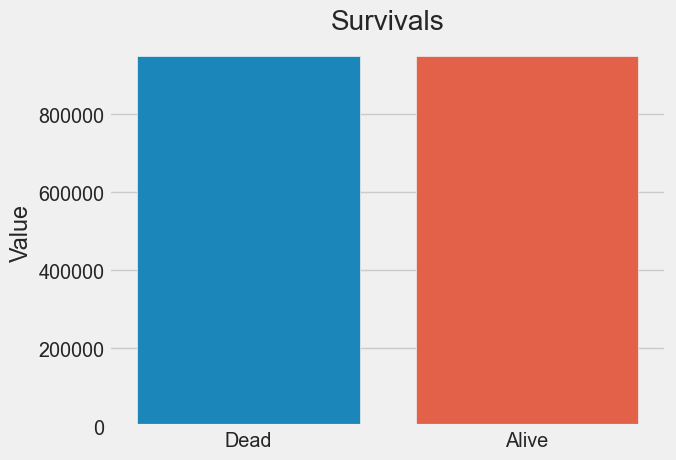

In [162]:
plt.figure()
# sns.barplot(y_rus.value_counts().index,y_rus.value_counts().values).set(title="Survivals",xticklabels=(["Dead","Alive"]),ylabel="Value")
sns.barplot(y_ros.value_counts().index,y_ros.value_counts().values).set(title="Survivals",xticklabels=(["Dead","Alive"]),ylabel="Value")
# sns.barplot(y.value_counts().index,y.value_counts().values).set(title="Survivals",xticklabels=(["Dead","Alive"]),ylabel="Value")
plt.show()

## Machine Learning models

1. Logistic Regression

In [163]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Logistic Regression Accuracy: ",lr.score(x_test,y_test))

Logistic Regression Accuracy:  0.9067309176100894


Logistic Regression F1 Score:  [0.9081204  0.90529877]


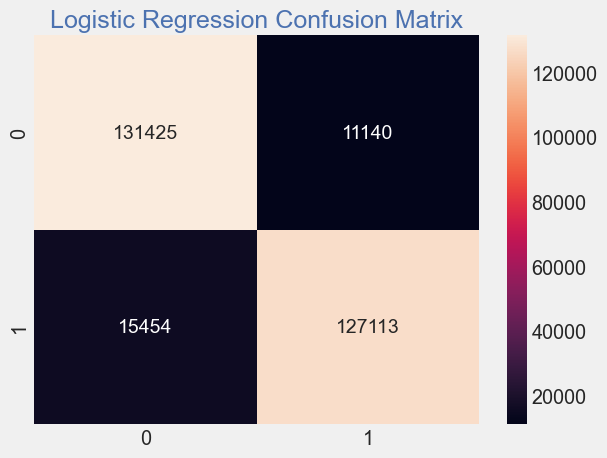

In [164]:
print("Logistic Regression F1 Score: ",f1_score(y_test,lr.predict(x_test),average=None))
plt.figure()
sns.heatmap(confusion_matrix(y_test, lr.predict(x_test)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="b")
plt.show()

5. Naive Bayes

In [165]:
nb=GaussianNB()
nb.fit(x_train,y_train)
print("Naive Base Score: ",nb.score(x_test,y_test))
print("Naive Base F1 Score: ",f1_score(y_test,nb.predict(x_test),average=None))

Naive Base Score:  0.8720417210274539
Naive Base F1 Score:  [0.87315345 0.87091033]


3. Decision Tree

In [166]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
print("Decision Tree Score: ",dt.score(x_test,y_test))
print("Decision Tree F1 Score: ",f1_score(y_test,dt.predict(x_test),average=None))

Decision Tree Score:  0.9450079261535008
Decision Tree F1 Score:  [0.94687915 0.94300006]


4. Random Forest

In [167]:
rf=RandomForestClassifier(n_estimators=4,random_state=50)
rf.fit(x_train,y_train)
print("Random Forest Score: ",rf.score(x_test,y_test))
print("Random Forest F1 Score: ",f1_score(y_test,rf.predict(x_test),average=None))

Random Forest Score:  0.9428510303999551
Random Forest F1 Score:  [0.94483844 0.94071506]


2. AdaBoost

In [168]:
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
print("AdaBoost Score: ",adb.score(x_test,y_test))
print("AdaBoost F1 Score: ",f1_score(y_test,adb.predict(x_test),average=None))

AdaBoost Score:  0.9033921131265519
AdaBoost F1 Score:  [0.90391645 0.90286202]
